# Perguntas para Análise Exploratória de Dados (EDA)

Este conjunto de perguntas foi elaborado para orientar uma EDA sobre um dataset de estudantes com informações de hábitos, estilo de vida, desempenho acadêmico e características pessoais.

## 1. Perfil dos Estudantes
- Qual é a distribuição de idade dos estudantes?
- Qual é a proporção de gênero?
- Qual a distribuição da escolaridade dos pais?

## 2. Hábitos e Estilo de Vida
- Qual é a média de horas de estudo por dia? Há diferenças por gênero?
- Estudantes que trabalham meio período estudam menos?
- Qual a relação entre horas de redes sociais/Netflix e horas de estudo?
- Qual é a média de horas de sono por dia? Existe alguma relação entre sono e notas?
- Estudantes que se exercitam mais têm melhor saúde mental?

## 3. Desempenho Acadêmico
- Qual é a média de notas por categoria (`nota_prova_cat`)?
- Estudantes com maior frequência nas aulas têm melhores notas?
- Estudantes com pais com maior escolaridade têm melhor desempenho?


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
warnings.filterwarnings("ignore")

#Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_parquet("dados_parquet")
df.drop(columns=['id'], inplace=True)

In [3]:
df.dtypes

,0
idade,uint8
genero,category
horas_estudo_pdia,float16
horas_redessoc_pdia,float16
horas_netflix_pdia,float16
trabalha_meio_periodo,bool
porcentagem_frequencia,float16
horas_sono_pdia,float16
qualidade_dieta,category
frequencia_exercicio,uint8


### Analisando distribuição de valores com Boxplot

In [4]:
plt.rcParams["figure.figsize"] = [15.00, 15.00]
plt.rcParams["figure.autolayout"] = True

In [5]:
numeric_df = df.select_dtypes(include='number')
numeric_df.dtypes

,0
idade,uint8
horas_estudo_pdia,float16
horas_redessoc_pdia,float16
horas_netflix_pdia,float16
porcentagem_frequencia,float16
horas_sono_pdia,float16
frequencia_exercicio,uint8
classificacao_saude_mental,uint8
notas_prova,float16


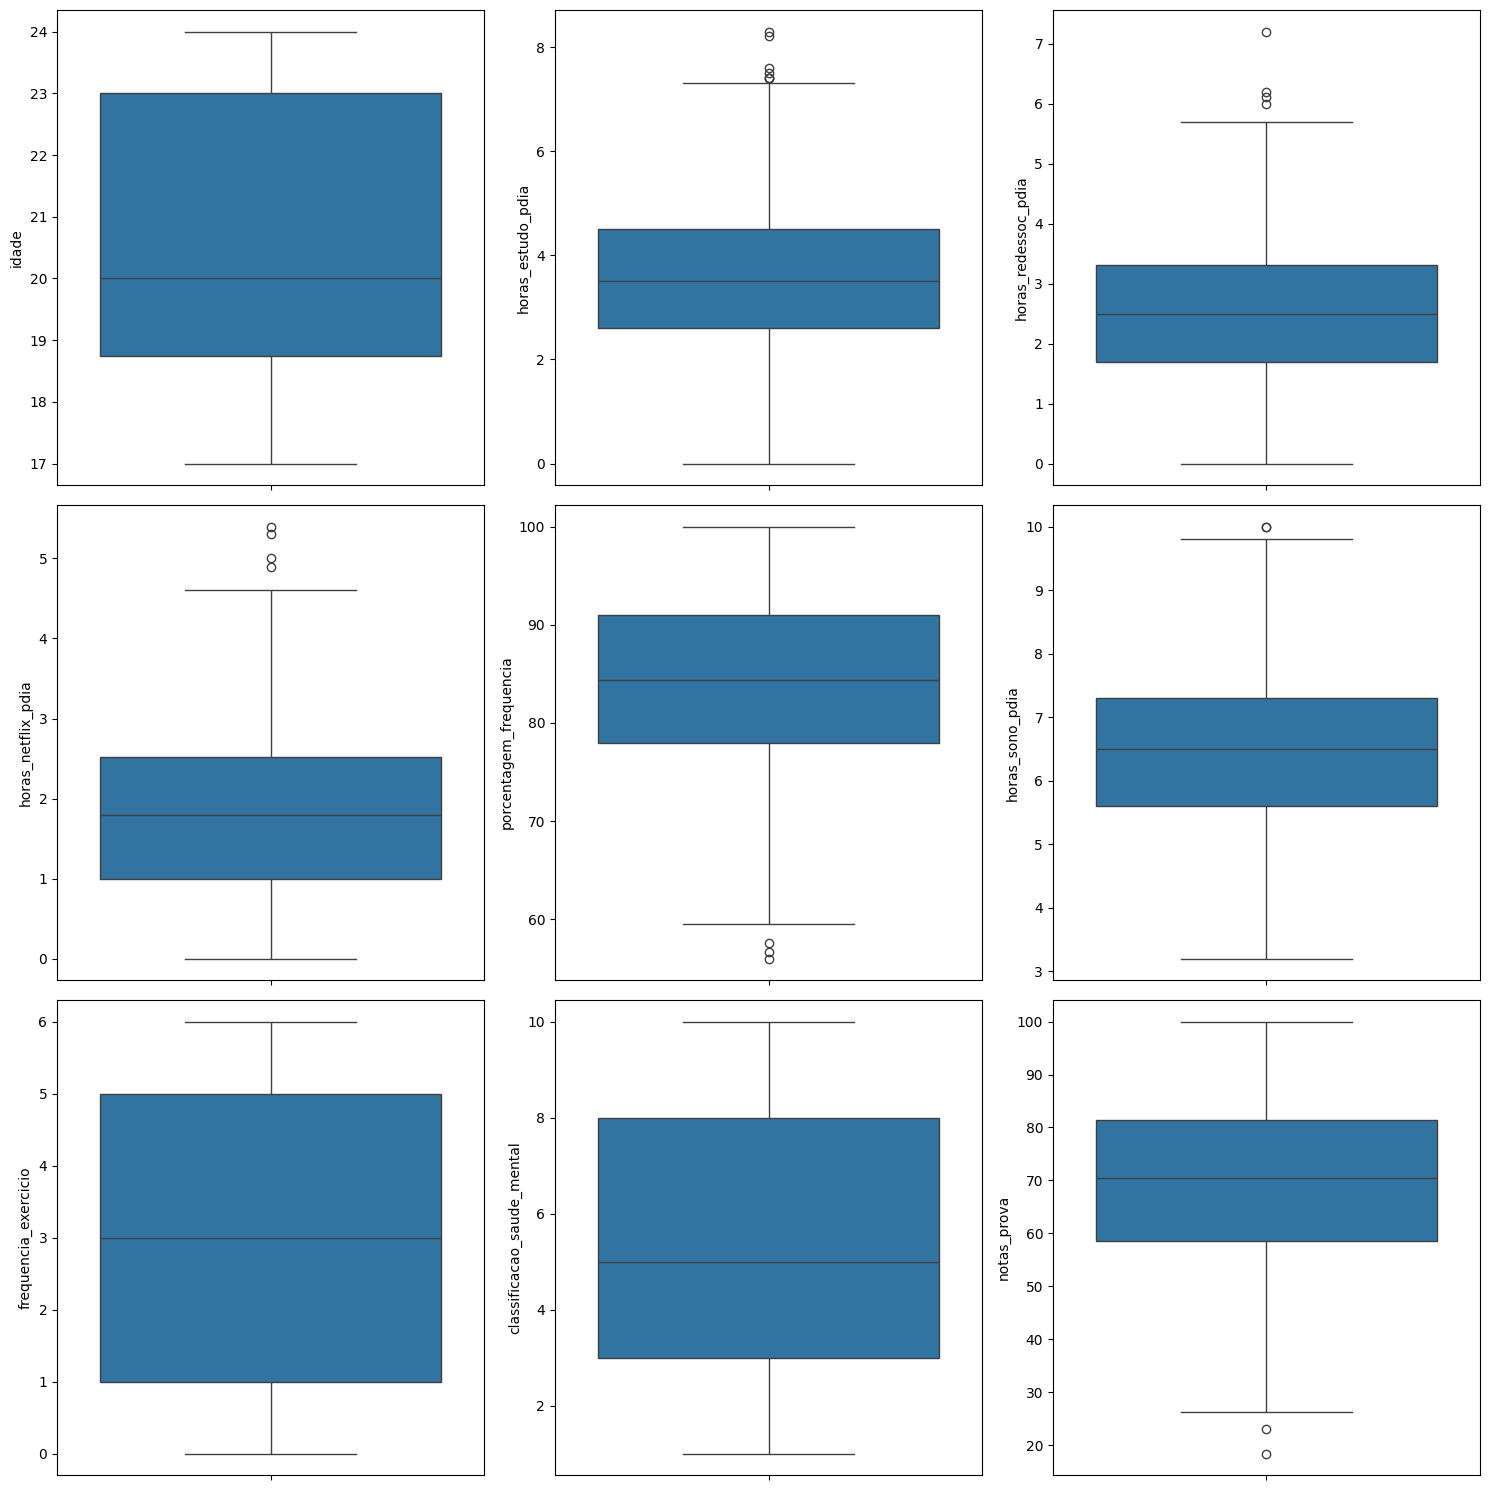

In [6]:
f, axes = plt.subplots(3, 3) #3 linhas e 3 colunas
linha = 0
coluna = 0

for i in numeric_df:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()


In [7]:
# Criando o df somente com as categoricas
categoric_df = df.select_dtypes(include=["category","bool"])
categoric_df.head()

,genero,trabalha_meio_periodo,qualidade_dieta,escolaridade_dos_pais,qualidade_internet,participacao_extracurricular,nota_prova_cat
0,F,False,Razoavel,Mestrado,Mediana,True,media
1,F,False,Boa,Ensino medio,Mediana,False,boa
2,M,False,Baixa,Ensino medio,Baixa,False,baixa
3,F,False,Baixa,Mestrado,Boa,True,baixa
4,F,False,Razoavel,Mestrado,Boa,False,media


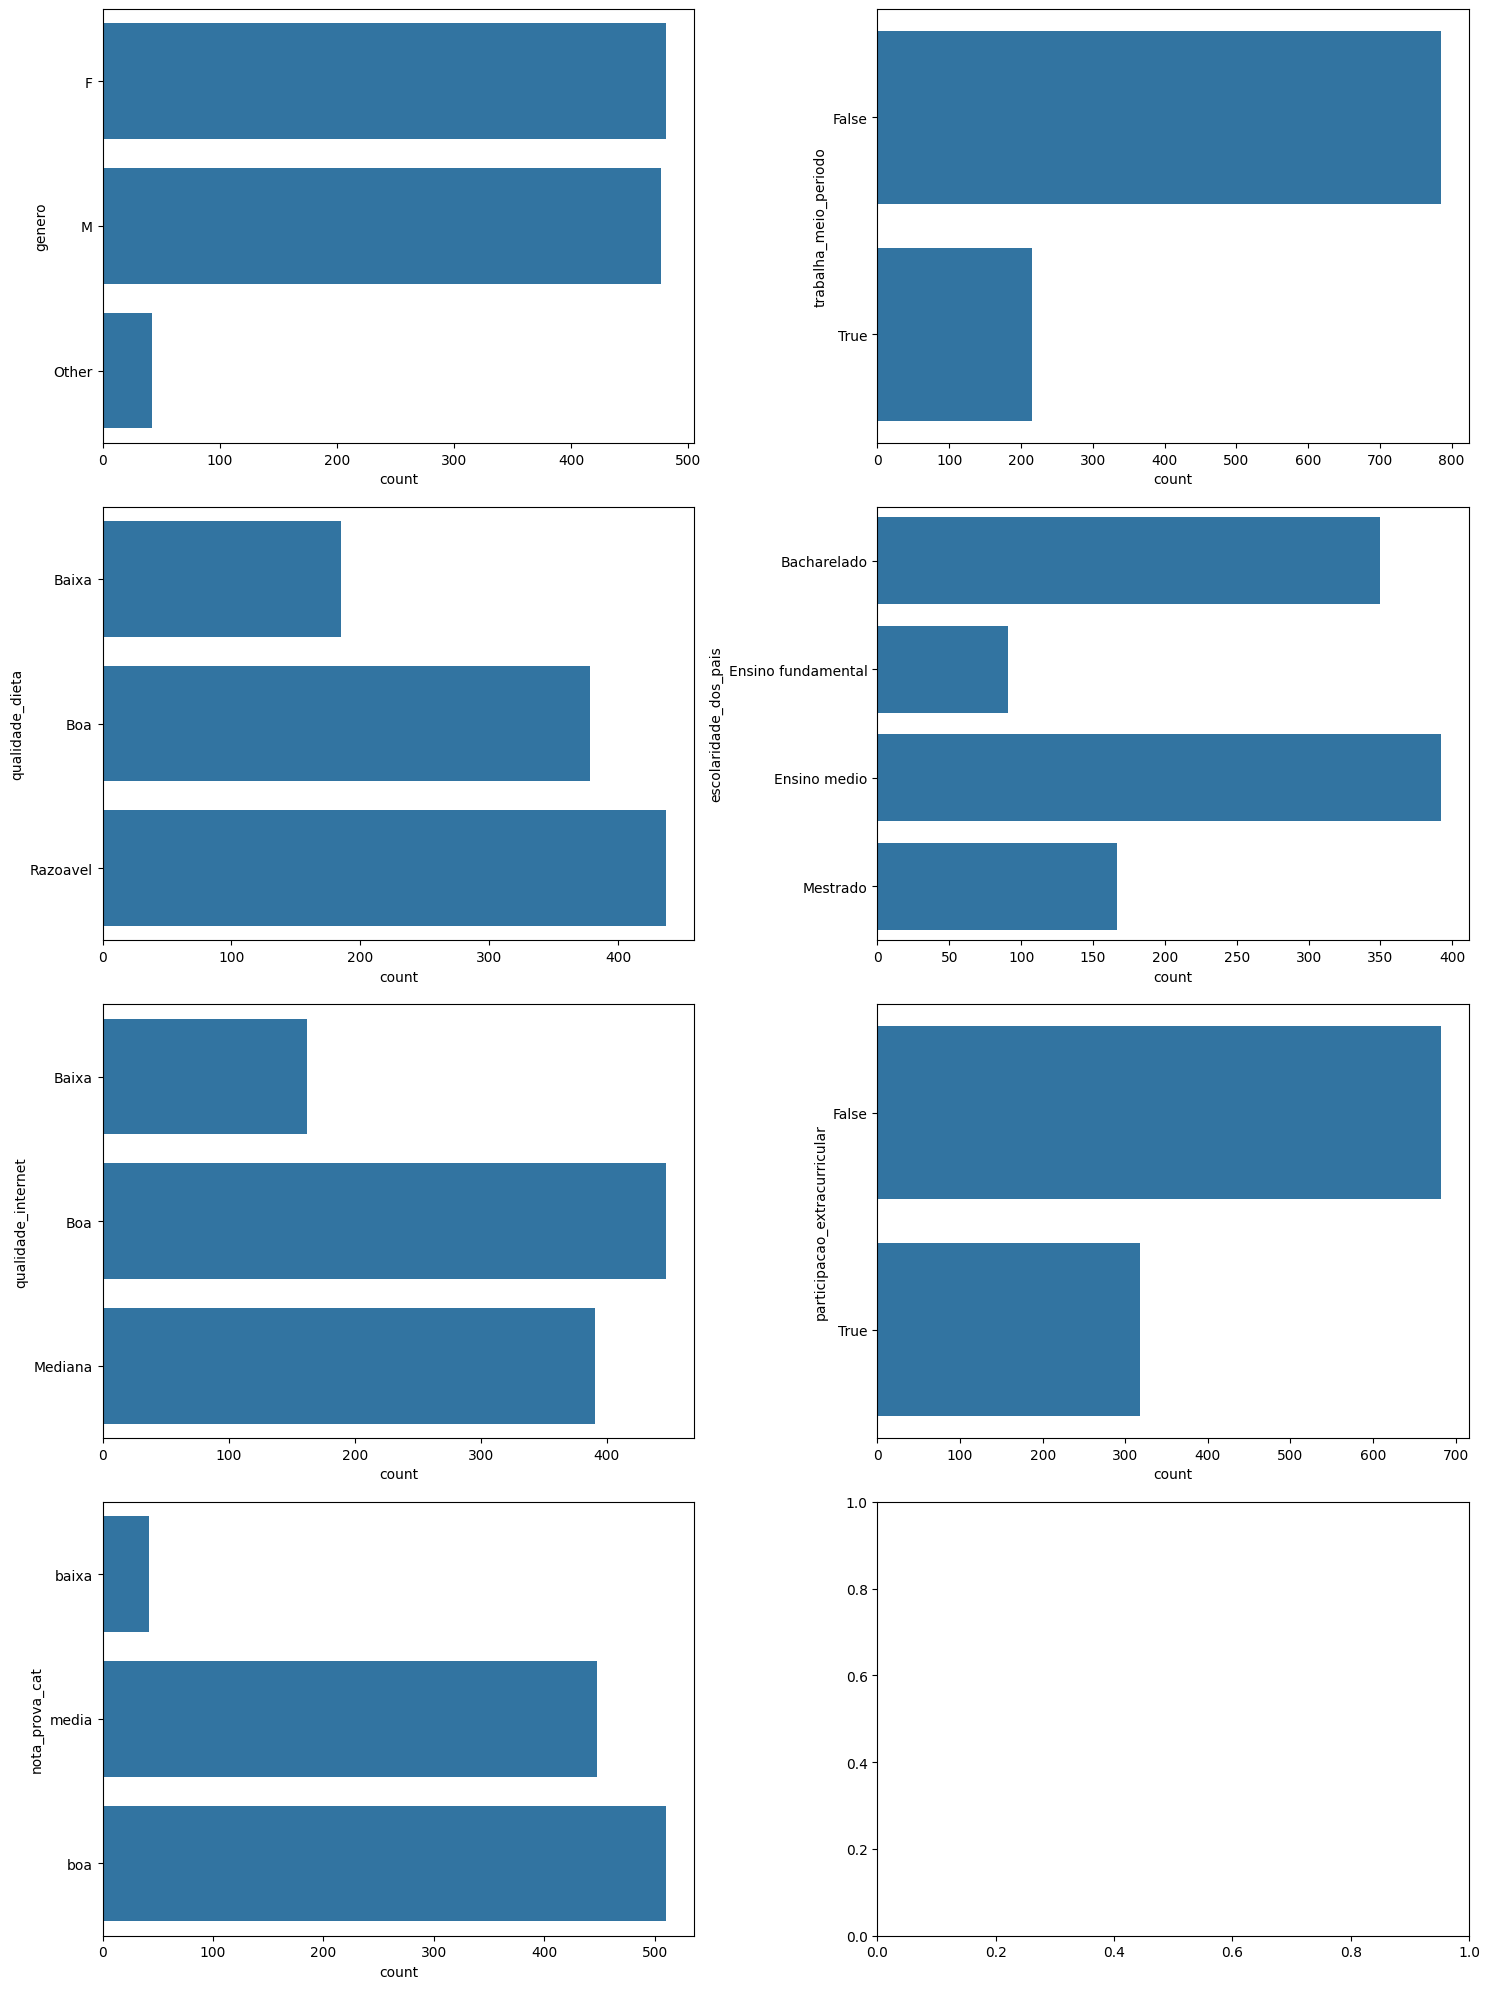

In [8]:
plt.rcParams["figure.figsize"] = [15.00, 20.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(4, 2)
linha = 0
coluna = 0

for i in categoric_df:
    sns.countplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

### Histograma

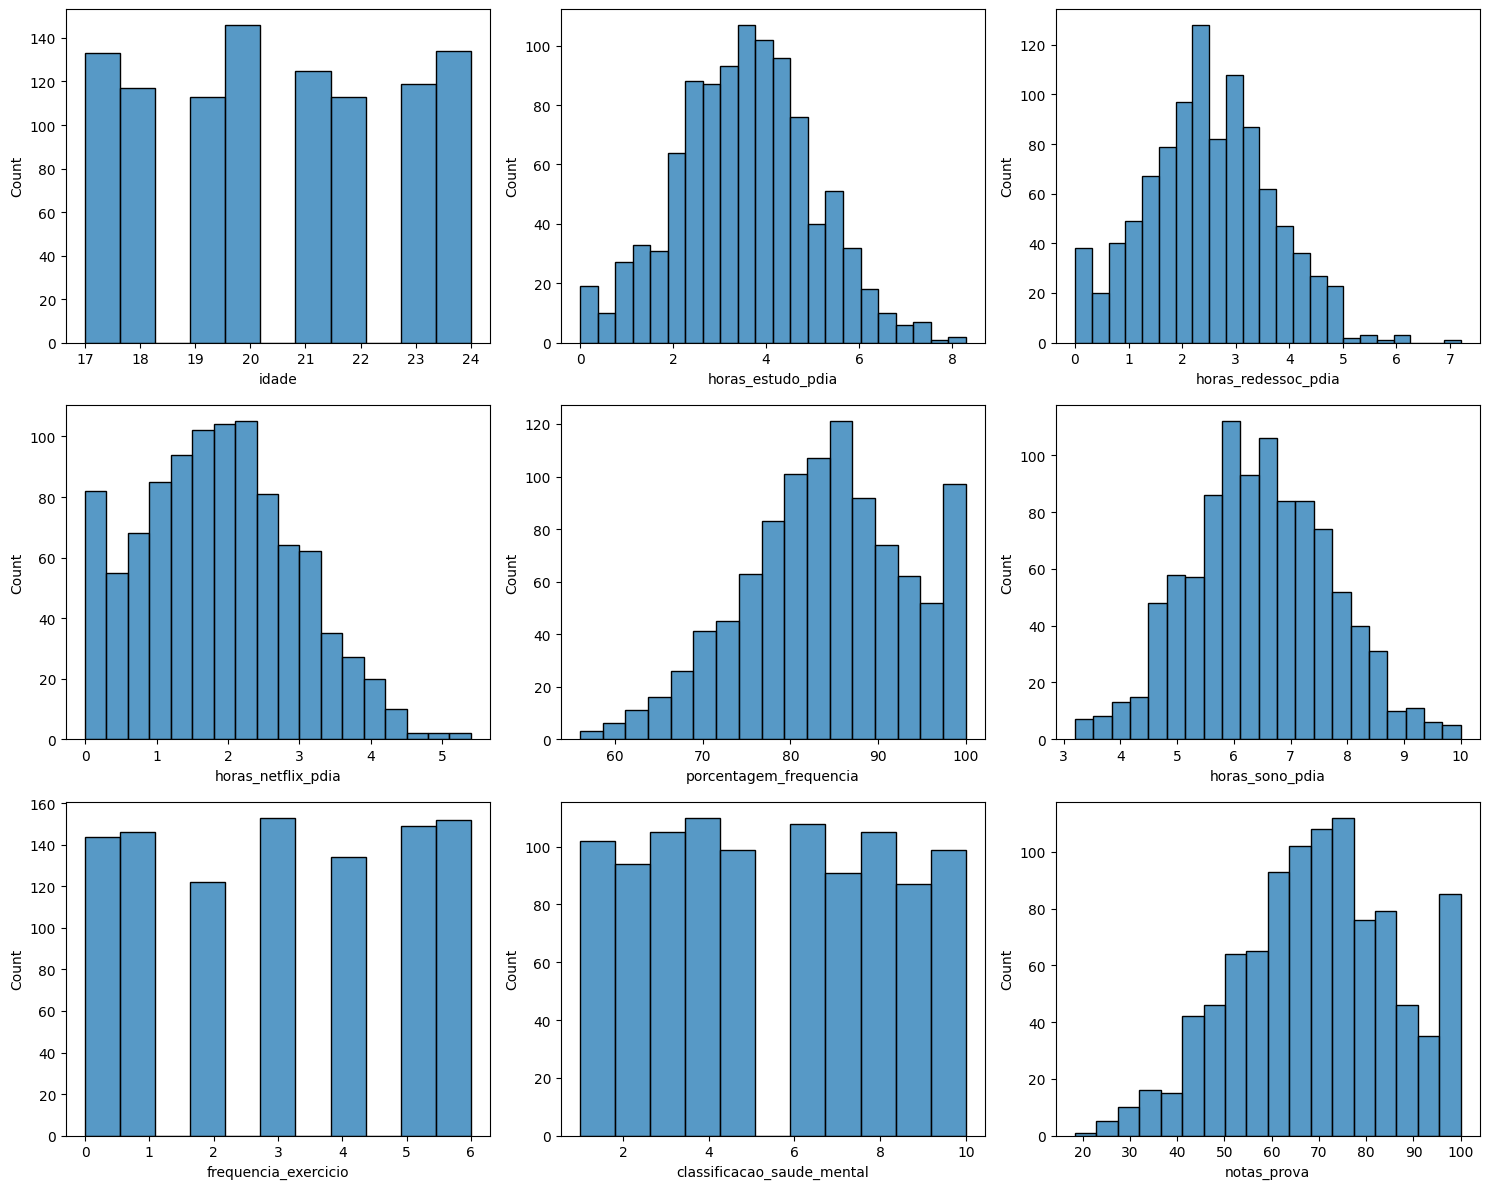

In [9]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 3) #3 linhas e 3 colunas
linha = 0
coluna = 0
for i in numeric_df:
     sns.histplot(data = df, x=i, ax=axes[linha][coluna])
     coluna += 1
     if coluna == 3:
         linha += 1
         coluna = 0

plt.show()

### Correlação entre variáveis numéricas

In [10]:
correlation_matrix = numeric_df.corr(method='spearman')


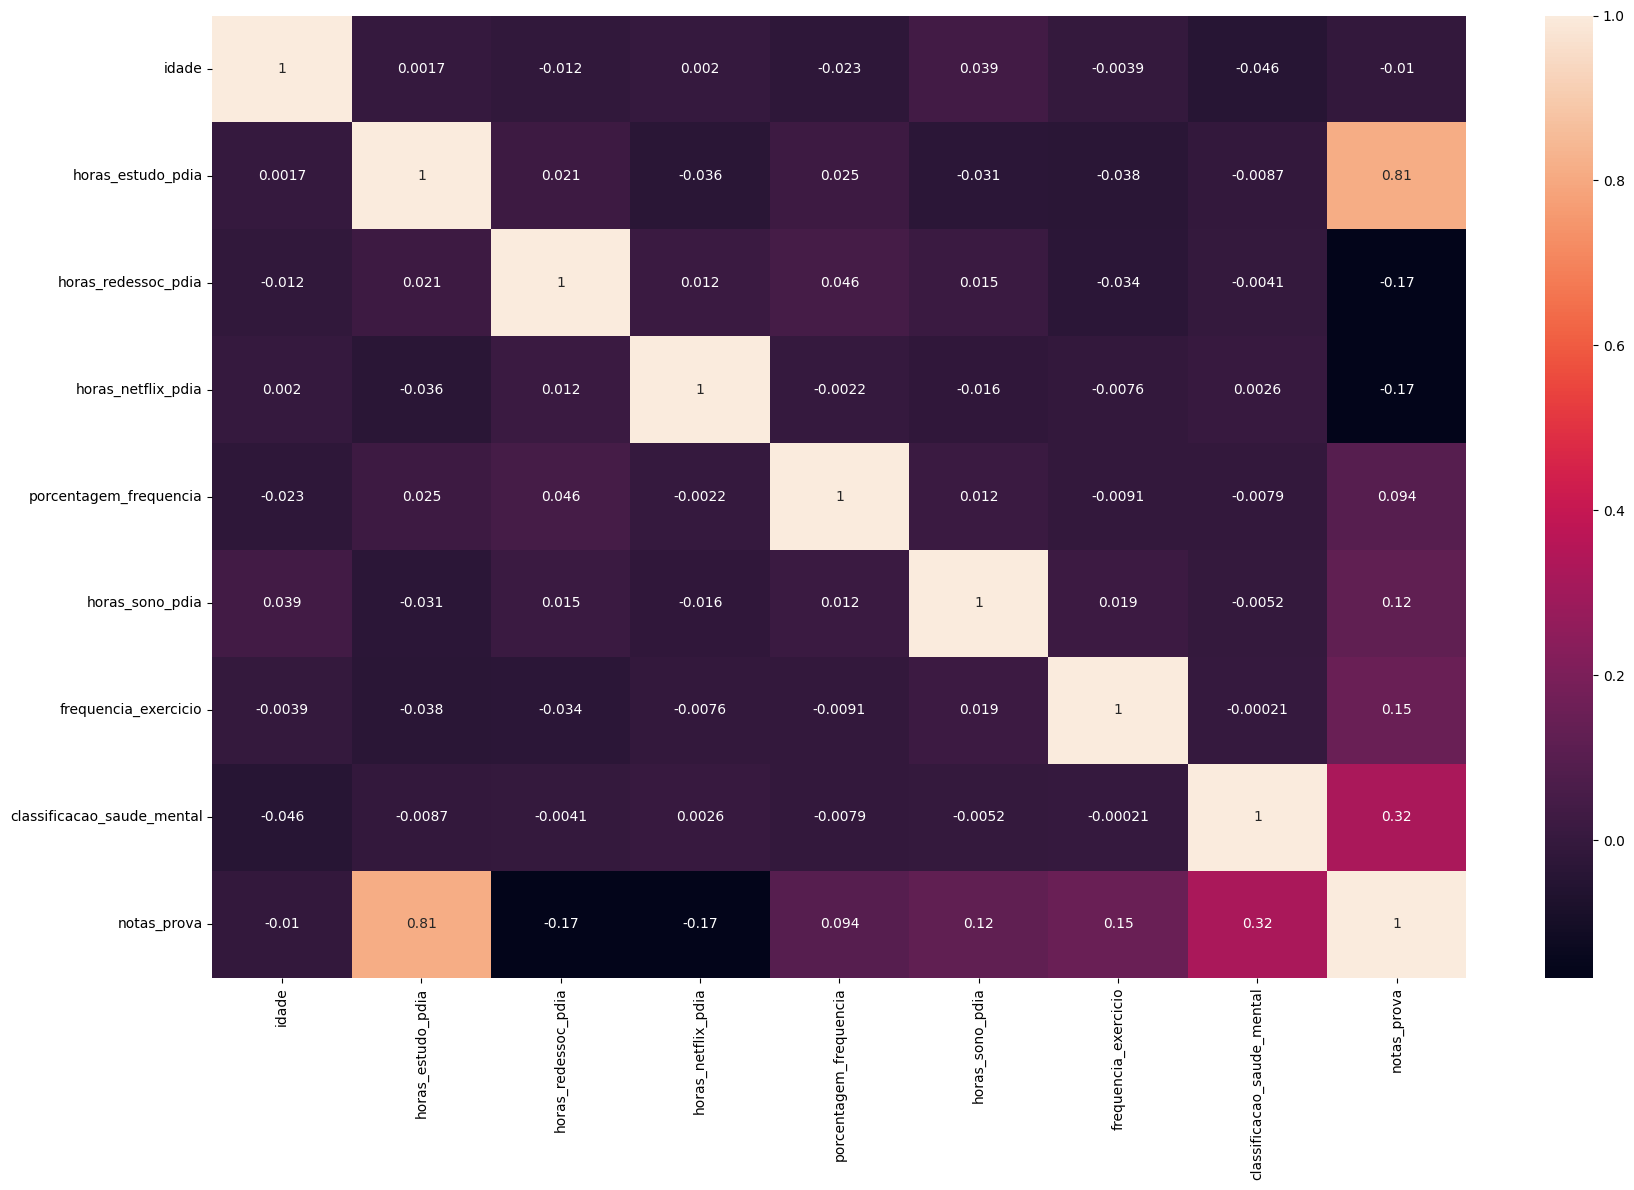

In [11]:
plt.rcParams["figure.figsize"] = (18,12)
ax = sns.heatmap(correlation_matrix, annot=True)


## 1. Perfil dos Estudantes
- Qual é a distribuição de idade dos estudantes?
- Qual é a proporção de gênero?
- Qual a distribuição da escolaridade dos pais?

In [13]:
fig = px.histogram(df, x='idade', nbins=10, title='Distribuição de Idade')
fig.update_layout(bargap=0.1, xaxis_title='Idade', yaxis_title='Frequência')
fig.show()

In [14]:
fig = px.treemap(df, path=['genero'], title='Distribuição por Gênero')
fig.update_traces(textinfo='label+percent parent')
fig.show()

In [16]:
fig = px.histogram(df, x='escolaridade_dos_pais', nbins=10, title='Distribuição de Escolaridades dos Pais')
fig.update_layout(bargap=0.1, xaxis_title='Escolaridade', yaxis_title='Frequência')
fig.show()

## 2. Hábitos e Estilo de Vida
- Qual é a média de horas de estudo por dia? Há diferenças por gênero?
- Estudantes que trabalham meio período estudam menos?
- Qual a relação entre horas de redes sociais/Netflix e horas de estudo?
- Qual é a média de horas de sono por dia? Existe alguma relação entre sono e notas?
- Estudantes que se exercitam mais têm melhor saúde mental?

In [17]:
# Qual é a média de horas de estudo por dia?
df["horas_estudo_pdia"].mean()

np.float16(3.55)

In [18]:
# Há diferenças por gênero?
df.groupby("genero")["horas_estudo_pdia"].mean().to_frame()

,horas_estudo_pdia
genero,
F,3.583806
M,3.510767
Other,3.611979


In [ ]:
# Estudantes que trabalham meio período estudam menos?
df.groupby("trabalha_meio_periodo")["horas_estudo_pdia"].mean().to_frame()

,horas_estudo_pdia
trabalha_meio_periodo,
False,3.572546
True,3.468375


In [19]:
# Análise de estudo (horas por dia) por gênero e trabalho de meio período
df.groupby(["genero", "trabalha_meio_periodo"])["horas_estudo_pdia"].mean().to_frame()

horas_estudo_pdia
genero trabalha_meio_periodo                   
F      False                           3.607813
       True                            3.487526
M      False                           3.517765
       True                            3.487141
Other  False                           3.778229
       True                            3.079980

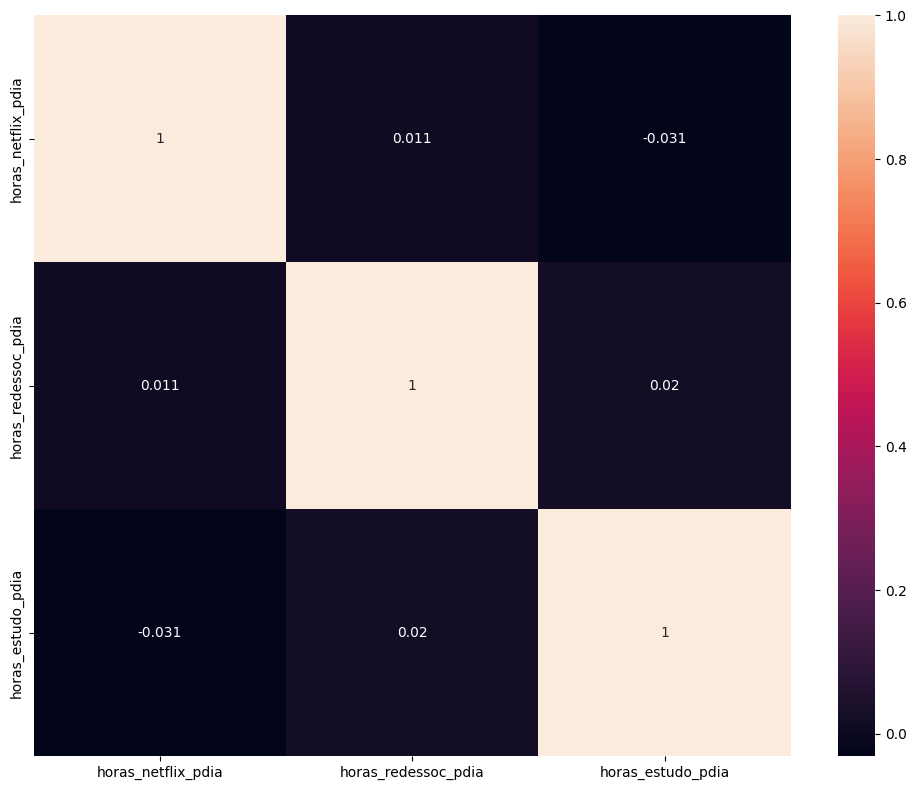

In [20]:
# Qual a relação entre horas de redes sociais/Netflix e horas de estudo?
corr_redes_netflix_estudos = df[['horas_netflix_pdia', 'horas_redessoc_pdia', 'horas_estudo_pdia']].corr()
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(corr_redes_netflix_estudos, annot=True)


In [21]:
# Qual é a média de horas de sono por dia?
df["horas_sono_pdia"].mean()

np.float16(6.473)

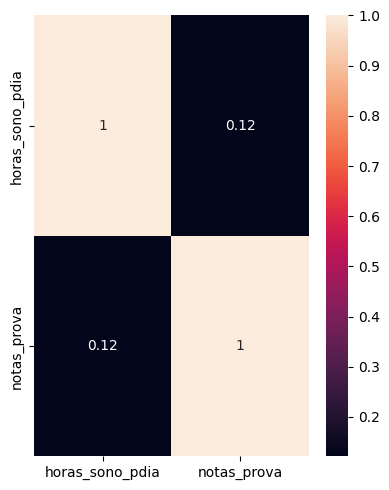

In [22]:
# Existe alguma relação entre sono e notas?
plt.rcParams["figure.figsize"] = (4,5)
ax = sns.heatmap(df[["horas_sono_pdia","notas_prova"]].corr(), annot=True)

In [24]:
# Estudantes que se exercitam mais têm melhor saúde mental?
df.groupby("frequencia_exercicio")["classificacao_saude_mental"].mean().to_frame()

,classificacao_saude_mental
frequencia_exercicio,
0,5.222222
1,5.458904
2,5.532787
3,5.810458
4,5.283582
5,5.416107
6,5.328947


## 3. Desempenho Acadêmico
- Qual é a média de notas por categoria (`nota_prova_cat`)?
- Estudantes com maior frequência nas aulas têm melhores notas?
- Estudantes com pais com maior escolaridade têm melhor desempenho?

In [25]:
# Média de notas por categoria
df.groupby("nota_prova_cat")["notas_prova"].mean()

,notas_prova
nota_prova_cat,
baixa,33.063988
media,57.845913
boa,82.936150


In [26]:
# Estudantes com frequência maior que 80%
filtro = df["porcentagem_frequencia"] > 80.0
df_alunos_frequentes = df.loc[filtro]

# Ver a média das notas desses alunos
df_alunos_frequentes['notas_prova'].mean()


np.float16(70.3)

In [27]:
# Estudantes com frequência menor que 70%
filtro = df["porcentagem_frequencia"] < 70.0
df_alunos_faltantes= df.loc[filtro]

# Ver a média das notas desses alunos
df_alunos_faltantes['notas_prova'].mean()


np.float16(67.7)

In [28]:
# Estudantes com pais com maior escolaridade têm melhor desempenho?
df.groupby("escolaridade_dos_pais")["notas_prova"].mean()

,notas_prova
escolaridade_dos_pais,
Bacharelado,70.272057
Ensino fundamental,70.029015
Ensino medio,69.547356
Mestrado,68.087852
